## **Load libraries and data**

In [6]:
!pip install --upgrade pythainlp
!pip install pyLDAvis
!pip install sefr_cut

  Using cached typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.0 which is incompatible.
  Using cached numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 re

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tinydb 4.5.1 requires typing-extensions<4.0.0,>=3.10.0; python_version <= "3.7", but you have typing-extensions 3.7.4.3 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 whic

In [15]:
!pip install -U pandas-profiling

     |████████████████████████████████| 248 kB 16.1 MB/s 
     |████████████████████████████████| 3.1 MB 21.5 MB/s 
     |████████████████████████████████| 1.1 MB 62.7 MB/s 
     |████████████████████████████████| 102 kB 66.8 MB/s 
     |████████████████████████████████| 636 kB 54.0 MB/s 
     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 10.1 MB 71.0 MB/s 
     |████████████████████████████████| 62 kB 611 kB/s 
     |████████████████████████████████| 812 kB 53.7 MB/s 
     |████████████████████████████████| 28.5 MB 34 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7bf2b7871a462cb9a8c559e96b938d9da9b8b373767b8170857bf3d703d47350
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107437 sha256=f2d7f281b12fdc2f6325c114afcb6887f4ba4fa8c4f41b3c954b50bcc5806775
  Stored in dir

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


import pythainlp
from pythainlp.tokenize import sent_tokenize, word_tokenize
import gensim

import sefr_cut
sefr_cut.load_model(engine='tl-deepcut-ws1000')
# sefr_cut.load_model(engine='ws1000')


# import tensorflow_hub as hub
# import tensorflow_text
# import tensorflow as tf

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

loading model.....
Success


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
path = '/content/drive/MyDrive/BADS_NIDA/CRM/VoiceCustomer/'

In [205]:
df = pd.read_csv(path+'Wongnai_Review.csv')

In [206]:
df

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0
5,6,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,12f2b56b28bb4849a92690cedc1cc50a,กินให้อิ่ม ที่ momo,ร้านบุฟเฟ่ ชาบูแนวญี่ปุ่น สายเนื้อหมู เนื้อวัว...,4.0
6,7,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,f2628bf47a394345b133fec76a79661d,ชาบู - สุกกี้สไลต์ญี่ปุ่นที่แท้ทรู,Number 20 : โมโม – พาราไดส์ (สาขาเดอะมอลบางกะป...,4.0
7,8,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,backscrash,ร้านชาบูเฟรนไชส์ ที่ราคาเหมาะสมกับคุณภาพ ถือว่...,ร้านชาบูเฟรนไชส์รสชาติดีมากคุ้มค่าเหมาะสมกับรา...,4.0
8,9,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,a477a5812ada4d5b80fd04fca22bdbca,อร่อยคุ้ม ของทานเล่นเยอะมาก,มา านที่ขาบูชิต้องมาตอนหิว ไม่งั้นจะไม่คุ้มนะค...,4.0
9,10,4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,fd2ba94ec1bc4948ae109e2cb6c9cbc6,ทานอีก ชอบกุ้งทอดเทมปุระ,ใครชอบกุ้งทอดเทมปุระ แค่กุ้งเทมปุระก็คุ้มแล้ว ...,3.0


# **Tokenize Words & Cleansing**

In [207]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\r','\n','ร้าน','(',')',':','/','-','+','!','.','?']
screening_words = stopwords+removed_words

import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def tokenize_with_space(sentence):
    merged=''
    words = pythainlp.word_tokenize(str(sentence),engine='newmm')
    for word in words:
      word = word.strip().strip(':').strip('\u200b').strip('+').strip('%')
      word = re.sub(r'\d+', '', word)
      if word not in screening_words:
        if len(word) > 0:
          merged=merged+','+word.strip()
    return merged[1:]


In [208]:
df['Review_cleansing'] = df['Review'].apply(lambda x: tokenize_with_space(x))
df['Review_cleansing'] = df['Review_cleansing'].apply(lambda x: deEmojify(x))

In [209]:
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_cleansing
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,..."
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"นึกถึง,ชาบู,ญี่ปุ่น,คิดถึง,โม,โม่,พาราไดซ์,คุณ..."
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"ทาน,นั่ง,โต๊ะ,หม้อ,โต๊ะ,ยังมี,ฉาก,กั้น,น้ำ,ซุป..."
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"นึกถึง,ชาบู,เนื้อ,ราคา,โหด,เกินไป,นึกถึง,โม,โม..."
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"เดิน,หน้า,ได้กลิ่น,ชาบู,หอ,มมาก,โปร,บัตรเครดิต..."


# **Create Dictionary**

In [211]:
documents = df['Review_cleansing'].to_list()
documentss = []
for i in documents:
  if len(i) > 0:
    documentss.append(i)

texts=[[text for text in doc.split(',')] for doc in documentss]
dictionary = gensim.corpora.Dictionary(texts)

In [212]:
print(dictionary.token2id.keys())

dict_keys(['กิน', 'ข้างนอก', 'ความต้องการ', 'คอ', 'คุณภาพ', 'คุ้ม', 'จำกัด', 'ซุป', 'ดำ', 'ดี', 'ดีมาก', 'ถาด', 'ถาม', 'น่ารัก', 'น้ำ', 'น้ำจิ้ม', 'บริการ', 'บาท', 'ประทับใจ', 'พนักงาน', 'พอกับ', 'ภาพ', 'รสชาติ', 'ราคา', 'สรุป', 'สะอาดสะอ้าน', 'สัน', 'หลากหลาย', 'อร่อย', 'อันนี้', 'อาหาร', 'เคลม', 'เซ็ท', 'เต้าเจี้ยว', 'เนื้อ', 'เป็ด', 'เผ็ด', 'แบบนี้', 'แปลก', 'แฟน', 'โดยรวม', 'โมจิ', 'ใส่ใจ', 'ไม่ต้อง', 'ไอติม', 'CTW', 'Terminal', 'กา', 'การงด', 'คิดถึง', 'ชาบู', 'ญี่ปุ่น', 'ฐาน', 'ทะยอย', 'ทำงาน', 'ที่ทาง', 'นาที', 'นึกถึง', 'พนักงานบริการ', 'พระราม', 'พรีเมียม', 'พาราไดซ์', 'มาตรา', 'มีโอ', 'รายละเอียด', 'ลูกค้า', 'สมาทาน', 'สาขา', 'สู้', 'ออร์เดอร์', 'เครื่องดื่ม', 'เค้า', 'เจอ', 'เป็นกันเอง', 'เหวี่ยง', 'แจ้ง', 'โม', 'โม่', 'โอเค', '', 'กก', 'กรุบ', 'กั้น', 'ของหวาน', 'คนละ', 'คาว', 'คุ', 'คุ้มค่า', 'จาน', 'จิ้ม', 'จืด', 'ฉาก', 'ชอบ', 'ชาเขียว', 'ชิ้น', 'ซอย', 'ซอส', 'ตก', 'ตะ', 'ตัก', 'ตามน้ำ', 'ต่างกัน', 'ถั่ว', 'ถ่ายรูป', 'ทาน', 'นั่ง', 'นุ่ม', 'บด', 'บาร์', 'บู', 'ผัก', 'ภาษา

In [213]:
gensim_corpus = [dictionary.doc2bow(text,allow_update=True) for text in texts]
word_frequencies=[[(dictionary[id],frequence) for id,frequence in couple] for couple in gensim_corpus]

# **Topic Modeling**

In [218]:
num_topics = 4
chunksize = 4000
passes=20
iterations=50
eval_every=1

temp=dictionary[0]
id2word=dictionary.id2token

%time model=gensim.models.LdaModel(corpus=gensim_corpus,id2word=id2word,chunksize=chunksize, \
                                   alpha='auto',eta='auto' , \
                                   iterations=iterations,num_topics=num_topics, \
                                   passes=passes,eval_every=eval_every)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 608 ms, sys: 152 ms, total: 760 ms
Wall time: 618 ms


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [219]:
import pyLDAvis.gensim_models as gensimvis

gensimvis.prepare(model,gensim_corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.027062  0.032310       1        1  30.933636
3      0.048094  0.002352       2        1  29.870767
0     -0.022046 -0.034537       3        1  27.728162
1      0.001013 -0.000125       4        1  11.467434, topic_info=        Term       Freq      Total Category  logprob  loglift
0        กิน  20.000000  20.000000  Default  30.0000  30.0000
30     อาหาร  16.000000  16.000000  Default  29.0000  29.0000
252     กุ้ง  10.000000  10.000000  Default  28.0000  28.0000
270       เท   5.000000   5.000000  Default  27.0000  27.0000
261     ปุระ   5.000000   5.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
265   สายพาน   0.829469   6.373654   Topic4  -5.1983   0.1265
8         ดำ   0.778776   6.535339   Topic4  -5.2614   0.0384
15   น้ำจิ้ม   0.775902   6.517376   Topic4  -5.2651   0.0375
67      สาขา   0.866001  11.467131   Topic4  -5.1552  -0.4177
123     สั่ง   0.810089   9.773686   Topic4  -5.2220  -0.3246

[277 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
79        1  0.417046       
79        2  0.104262       
79        3  0.312785       
79        4  0.104262       
45        2  0.562200    CTW
...     ...       ...    ...
155       1  0.513794    ไม้
44        1  0.378560  ไอติม
44        2  0.252373  ไอติม
44        3  0.252373  ไอติม
44        4  0.126187  ไอติม

[313 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [220]:
model.show_topic(0)

[('น้ำ', 0.022358084),
 ('ทาน', 0.01792523),
 ('ราคา', 0.016791545),
 ('ซุป', 0.0163458),
 ('บาท', 0.01629859),
 ('อาหาร', 0.014626152),
 ('อร่อย', 0.014597601),
 ('ชาบู', 0.014133734),
 ('ดี', 0.014048243),
 ('เลือก', 0.013887362)]

In [221]:
df['topic'] = df['Review_cleansing'].apply(lambda x:model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score']=df['Review_cleansing'].apply(lambda x:model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [234]:
df.head()

,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_cleansing,topic,score
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,...",1,0.998249
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"นึกถึง,ชาบู,ญี่ปุ่น,คิดถึง,โม,โม่,พาราไดซ์,คุณ...",3,0.997784
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"ทาน,นั่ง,โต๊ะ,หม้อ,โต๊ะ,ยังมี,ฉาก,กั้น,น้ำ,ซุป...",2,0.999395
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"นึกถึง,ชาบู,เนื้อ,ราคา,โหด,เกินไป,นึกถึง,โม,โม...",3,0.996755
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"เดิน,หน้า,ได้กลิ่น,ชาบู,หอ,มมาก,โปร,บัตรเครดิต...",3,0.997501


# **Explore proportion of words each topic**

In [247]:
df_relation = df[['Review_cleansing','topic']].copy()
df_relation.head()

,Review_cleansing,topic
0,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,...",1
1,"นึกถึง,ชาบู,ญี่ปุ่น,คิดถึง,โม,โม่,พาราไดซ์,คุณ...",3
2,"ทาน,นั่ง,โต๊ะ,หม้อ,โต๊ะ,ยังมี,ฉาก,กั้น,น้ำ,ซุป...",2
3,"นึกถึง,ชาบู,เนื้อ,ราคา,โหด,เกินไป,นึกถึง,โม,โม...",3
4,"เดิน,หน้า,ได้กลิ่น,ชาบู,หอ,มมาก,โปร,บัตรเครดิต...",3


In [303]:
df_relation['Review_cleansing'] = df_relation[['topic','Review_cleansing']].groupby(['topic'])['Review_cleansing'].transform(lambda x: ','.join(x))
df_relation = df_relation[['topic','Review_cleansing']].drop_duplicates()
df_relation

,topic,Review_cleansing
0,1,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,..."
1,3,"นึกถึง,ชาบู,ญี่ปุ่น,คิดถึง,โม,โม่,พาราไดซ์,คุณ..."
2,2,"ทาน,นั่ง,โต๊ะ,หม้อ,โต๊ะ,ยังมี,ฉาก,กั้น,น้ำ,ซุป..."
7,0,"ชาบู,เฟรนไชส์,รสชาติ,ดีมาก,คุ้มค่า,เหมาะสม,ราค..."


In [304]:
df_topic1=df_relation.loc[df_relation['topic'] == 0]
df_topic2=df_relation.loc[df_relation['topic'] == 1]
df_topic3=df_relation.loc[df_relation['topic'] == 2]
df_topic4=df_relation.loc[df_relation['topic'] == 3]

In [305]:
df_topic1

,topic,Review_cleansing
7,0,"ชาบู,เฟรนไชส์,รสชาติ,ดีมาก,คุ้มค่า,เหมาะสม,ราค..."


In [306]:
from collections import Counter

def count_words(df_tp,num_topic):
  tp_str = ''
  for w in df_tp:
    tp_str += w
  tp_ls = tp_str.split(',') 
  tp_len = len(tp_ls)
  count_word = dict(Counter(tp_ls))

  count_word_tp=pd.DataFrame(count_word.items(), columns=['word', 'count'])
  count_word_tp=count_word_tp.sort_values(['count'],ascending=False)
  count_word_tp['topic'] = num_topic

  return count_word_tp

In [307]:
count_words_tp1 = count_words(df_topic1['Review_cleansing'],'1')
count_words_tp2 = count_words(df_topic2['Review_cleansing'],'2')
count_words_tp3 = count_words(df_topic3['Review_cleansing'],'3')
count_words_tp4 = count_words(df_topic4['Review_cleansing'],'4')

In [309]:
frames = [count_words_tp1, count_words_tp2, count_words_tp3,count_words_tp4]
count_words_all = pd.concat(frames)
count_words_all

,word,count,topic
10,น้ำ,11,1
11,ซุป,9,1
7,บาท,9,1
6,ราคา,8,1
90,ทาน,7,1
...,...,...,...
98,ได้ยิน,1,4
99,ข่าว,1,4
103,งาน,1,4
113,โซน,1,4


In [311]:
index = count_words_all.index
number_words = len(index)
count_words_all['prop'] = count_words_all['count']/number_words
count_words_all

,word,count,topic,prop
10,น้ำ,11,1,0.013906
11,ซุป,9,1,0.011378
7,บาท,9,1,0.011378
6,ราคา,8,1,0.010114
90,ทาน,7,1,0.008850
...,...,...,...,...
98,ได้ยิน,1,4,0.001264
99,ข่าว,1,4,0.001264
103,งาน,1,4,0.001264
113,โซน,1,4,0.001264


In [333]:
df_prop_topic1=count_words_all.loc[count_words_all['topic'] == '1']
df_prop_topic1 = df_prop_topic1[df_prop_topic1.word != '']
df_prop_topic1_top=df_prop_topic1.head(15)
df_prop_topic2=count_words_all.loc[count_words_all['topic'] == '2']
df_prop_topic2 = df_prop_topic2[df_prop_topic2.word != '']
df_prop_topic2_top=df_prop_topic2.head(15)
df_prop_topic3=count_words_all.loc[count_words_all['topic'] == '3']
df_prop_topic3 = df_prop_topic3[df_prop_topic3.word != '']
df_prop_topic3_top=df_prop_topic3.head(15)
df_prop_topic4=count_words_all.loc[count_words_all['topic'] == '4']
df_prop_topic4 = df_prop_topic4[df_prop_topic4.word != '']
df_prop_topic4_top=df_prop_topic4.head(15)
frames2 = [df_prop_topic1_top, df_prop_topic2_top, df_prop_topic3_top,df_prop_topic4_top]
df_prop = pd.concat(frames2)
df_prop.head()

,word,count,topic,prop
10,น้ำ,11,1,0.013906
11,ซุป,9,1,0.011378
7,บาท,9,1,0.011378
6,ราคา,8,1,0.010114
90,ทาน,7,1,0.008850


In [337]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=15)

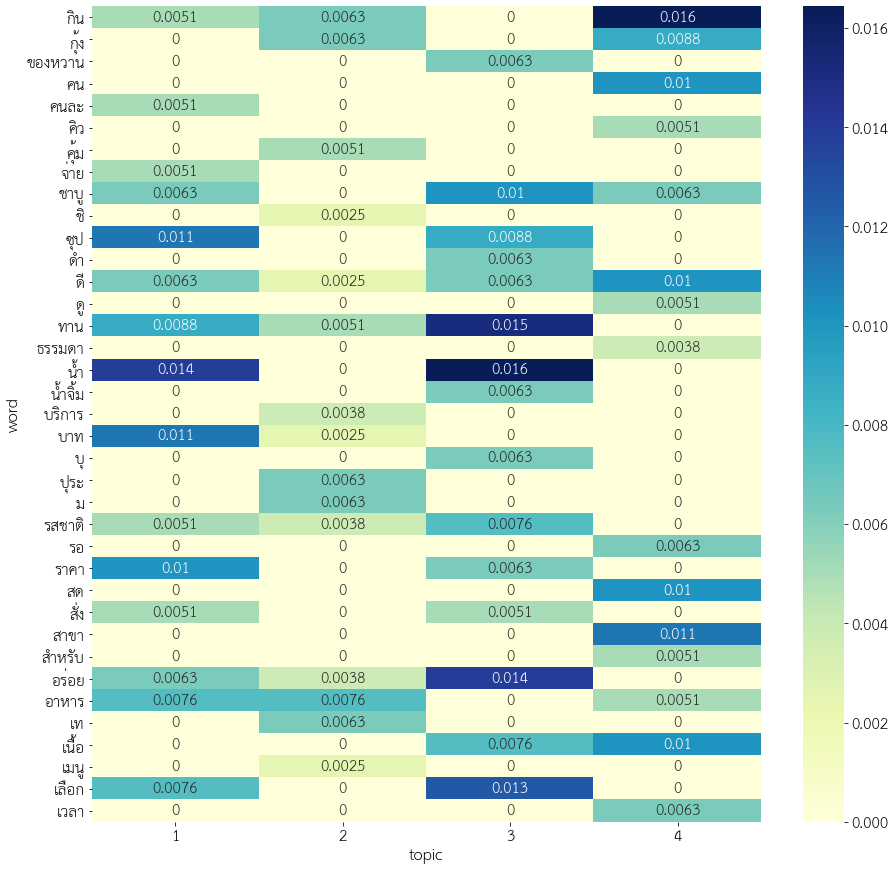

In [339]:
topic_prop = df_prop.pivot(index='word', columns='topic', values='prop')
topic_prop = topic_prop.fillna(0)

fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(topic_prop, annot=True, ax=ax,cmap="YlGnBu")

# **Explre proportion of topic each restaurants**

In [347]:
df_relation_topic_rest = df[['topic','Restaurant']].copy()
df_relation_topic_rest.head()

,topic,Restaurant
0,1,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ
1,3,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ
2,2,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ
3,3,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ
4,3,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ


In [348]:
df_relation_topic_rest = df_relation_topic_rest.groupby(['topic','Restaurant']).size().reset_index(name='counts')
df_relation_topic_rest['topic'] = df_relation_topic_rest['topic'] + 1
df_relation_topic_rest

,topic,Restaurant,counts
0,1,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,1
1,1,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,1
2,1,ข้าน้อยขอชาบู,4
3,2,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,1
4,2,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,2
5,3,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,3
6,3,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,3
7,3,ข้าน้อยขอชาบู,1
8,4,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,3
9,4,Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G,2


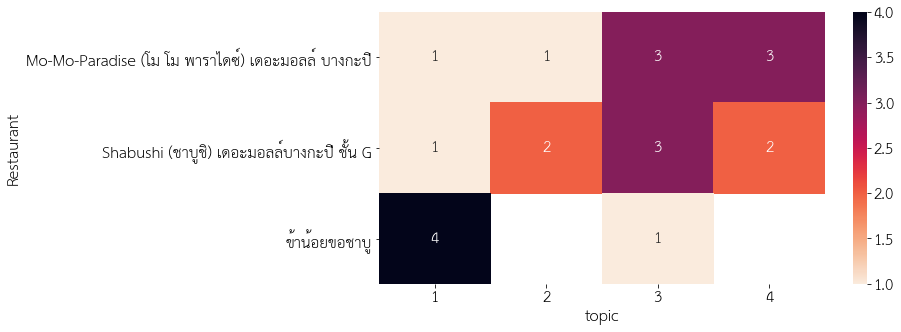

In [352]:
topic_rest_prop = df_relation_topic_rest.pivot(index='Restaurant', columns='topic', values='counts')

fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(topic_rest_prop, annot=True, ax=ax,cmap="rocket_r")